<a href="https://colab.research.google.com/github/SijieQiu/RQ/blob/main/626.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Append stopwords in content**

In [2]:
from google.colab import files

uploaded = files.upload()

Saving 127.docx to 127.docx
Saving c.txt to c.txt


In [6]:
# 常见英文停用词列表
stopwords = [
    'a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', 'aren\'t', 'as', 'at', 'be', 'because', 'been',
    'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can\'t', 'cannot', 'could', 'couldn\'t', 'did', 'didn\'t', 'do', 'does', 'doesn\'t',
    'doing', 'don\'t', 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn\'t', 'has', 'hasn\'t', 'have', 'haven\'t', 'having',
    'he', 'he\'d', 'he\'ll', 'he\'s', 'her', 'here', 'here\'s', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'how\'s', 'i', 'i\'d', 'i\'ll',
    'i\'m', 'i\'ve', 'if', 'in', 'into', 'is', 'isn\'t', 'it', 'it\'s', 'its', 'itself', 'let\'s', 'me', 'more', 'most', 'mustn\'t', 'my', 'myself',
    'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', 'shan\'t',
    'she', 'she\'d', 'she\'ll', 'she\'s', 'should', 'shouldn\'t', 'so', 'some', 'such', 'than', 'that', 'that\'s', 'the', 'their', 'theirs', 'them',
    'themselves', 'then', 'there', 'there\'s', 'these', 'they', 'they\'d', 'they\'ll', 'they\'re', 'they\'ve', 'this', 'those', 'through', 'to', 'too',
    'under', 'until', 'up', 'very', 'was', 'wasn\'t', 'we', 'we\'d', 'we\'ll', 'we\'re', 'we\'ve', 'were', 'weren\'t', 'what', 'what\'s', 'when', 'when\'s',
    'where', 'where\'s', 'which', 'while', 'who', 'who\'s', 'whom', 'why', 'why\'s', 'with', 'won\'t', 'would', 'wouldn\'t', 'you', 'you\'d', 'you\'ll',
    'you\'re', 'you\'ve', 'your', 'yours', 'yourself', 'yourselves'
]

# 将停用词列表保存为文本文件
with open('english_stopwords.txt', 'w', encoding='utf-8') as f:
    for word in stopwords:
        f.write(f"{word}\n")

print("Stopwords have been saved to 'english_stopwords.txt'")


Stopwords have been saved to 'english_stopwords.txt'


In [9]:
import docx
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# 加载自定义停用词
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        stop_words = set(f.read().strip().split('\n'))
    return stop_words

stop_words = load_stopwords('english_stopwords.txt')

# 读取docx文件
def read_docx(file_path):
    doc = docx.Document(file_path)
    data = []
    for para in doc.paragraphs:
        if '\t' in para.text:
            content, label = para.text.split('\t')
            data.append((content, label))
    return pd.DataFrame(data, columns=['content', 'label'])

# 处理content，去除停用词
def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# 读取文档
file_path = '127.docx'
df = read_docx(file_path)

# 处理content
df['content'] = df['content'].apply(remove_stopwords)

# 将处理后的数据保存回.docx文件
def save_to_docx(df, output_file_path):
    doc = docx.Document()
    for index, row in df.iterrows():
        content = row['content']
        label = row['label']
        doc.add_paragraph(f'{content}\t{label}')
    doc.save(output_file_path)

output_file_path = 'processed_document.docx'
save_to_docx(df, output_file_path)

print("Processing complete. The output file is saved as 'processed_document.docx'")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Processing complete. The output file is saved as 'processed_document.docx'


## **Convert the processed file into json file**

In [19]:
import json
!pip install python-docx
from docx import Document

file_name = 'processed_document.docx'

doc = Document(file_name)

data = []

for para in doc.paragraphs:
    if para.text.strip():
        parts = para.text.split('\t')
        if len(parts) >= 2:
            content = parts[0].strip()
            labels = [label.strip() for label in parts[1].split(',')]
            data.append({
                "content": content,
                "labels": labels
            })
print(f"Number of documents: {len(data)}")
print(f"Sample document: {data[0]}")

json_file_name = '2.json'
with open(json_file_name, 'w', encoding='utf-8') as json_file:
    json.dump(data, json_file, ensure_ascii=False, indent=4)

print(f"JSON file '{json_file_name}' created successfully!")

Number of documents: 27
Sample document: {'content': 'Joe Potter Matthew Trent work small, remote outpost middle snowy wilderness. Joe wakes Christmas Day find Matt preparing Christmas dinner, "I Wish Christmas Everyday" playing radio. Matt tries get Joe talk accepted job outpost, topic never discussed five years worked together. Joe reluctant say anything instead asks Matt took job. Happy conversation, Matt begins story. story set world people can access Internet augmented reality device implanted eyes called "Z-Eye". Matt dating coach taught seduction techniques single men struggle attract women. directs one clients, shy socially awkward Harry, gatecrashing office Christmas party, communicates Z-Eye. joined group call single men, voicing opinions suggestions. Using information Matt gathers social media, Harry convinces party guests know him, decides try bonding Jennifer, quiet "attractive outsider" join group conversations. Matt\'s help, Harry manages start conversation Jennifer, adm

## **LLDA MODEL**

In [20]:
!pip install tomotopy
import tomotopy as tp
import json
from collections import Counter

file_name = '2.json'

with open(file_name, 'r') as input_file:
    data = json.load(input_file)

unique_labels = set()
for index, row in enumerate(data):
    labels = set(row['labels'])
    unique_labels |= set(labels)

unique_label_count = len(unique_labels)
mdl = tp.LLDAModel(k=unique_label_count, min_cf=10, rm_top=5)

for index, row in enumerate(data):
    if index % 1000 == 0 and index > 0:
        print('Adding document #%s' % index)
    content = row['content']
    labels = row['labels']
    clean_document = [token for token in content.strip().split() if len(token) > 2]
    mdl.add_doc(clean_document, labels=labels)

print('Starting training model')
for i in range(0, 100, 10):
    mdl.train(10)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))

for k in range(mdl.k):
    print('Top 10 words of global topic #{} {}: {}'.format(k, mdl.topic_label_dict[k], mdl.get_topic_words(k, top_n=10)))

<ipython-input-20-d35ee1cf668c>:17: DeprecationWarning: `tomotopy.LLDAModel` is deprecated. Please use `tomotopy.PLDAModel` instead.
  mdl = tp.LLDAModel(k=unique_label_count, min_cf=10, rm_top=5)


Starting training model
Iteration: 0	Log-likelihood: -6.439975363481364
Iteration: 10	Log-likelihood: -6.29721956592743
Iteration: 20	Log-likelihood: -6.2625002872320605
Iteration: 30	Log-likelihood: -6.2229355125683155
Iteration: 40	Log-likelihood: -6.185631884666388
Iteration: 50	Log-likelihood: -6.173219022539119
Iteration: 60	Log-likelihood: -6.161365374946554
Iteration: 70	Log-likelihood: -6.167175741942593
Iteration: 80	Log-likelihood: -6.150859262346397
Iteration: 90	Log-likelihood: -6.154216763310863
Top 10 words of global topic #0 AI rights: [('explains', 0.13519719243049622), ('digital', 0.13519719243049622), ('one', 0.13519719243049622), ('work', 0.08117233961820602), ('came', 0.08117233961820602), ('went', 0.05415991693735123), ('sex', 0.04065370187163353), ('every', 0.04065370187163353), ('hear', 0.04065370187163353), ('world', 0.027147486805915833)]
Top 10 words of global topic #1 digital clone of a person: [('get', 0.11463973671197891), ('next', 0.08340275287628174), ('b

## **Saved the results in docx**

In [26]:

from docx import Document

# 创建一个新的Word文档
doc = Document()
doc.add_heading('Global Topics and Top Words', 0)

# 遍历所有204个全局主题，并将其输出到文档中
for k in range(205):
    # 打印每个主题的前10个词
    print("Topic #{} {}: {}".format(k, mdl.topic_label_dict[k], mdl.get_topic_words(k, top_n=10)))
    # 将结果添加到Word文档中
    doc.add_heading('Global Topic #{}'.format(k), level=1)
    doc.add_paragraph('Label: {}'.format(mdl.topic_label_dict[k]))
    doc.add_paragraph('Top 10 Words: {}'.format(', '.join([word for word, _ in mdl.get_topic_words(k, top_n=10)])))

# 保存Word文档到本地路径
doc.save('final.docx')

print('Word document created successfully with 204 topics and their top 10 words.')

Topic #0 AI rights: [('explains', 0.13519719243049622), ('digital', 0.13519719243049622), ('one', 0.13519719243049622), ('work', 0.08117233961820602), ('came', 0.08117233961820602), ('went', 0.05415991693735123), ('sex', 0.04065370187163353), ('every', 0.04065370187163353), ('hear', 0.04065370187163353), ('world', 0.027147486805915833)]
Topic #1 digital clone of a person: [('get', 0.11463973671197891), ('next', 0.08340275287628174), ('body', 0.06257809698581696), ('still', 0.06257809698581696), ('reveals', 0.06257809698581696), ('day', 0.052165765315294266), ('need', 0.052165765315294266), ('without', 0.041753437370061874), ('story', 0.041753437370061874), ('social', 0.031341105699539185)]
Topic #2 speculative virtual reality: [('can', 0.058485109359025955), ('him.', 0.04925547540187836), ('leaves', 0.033872753381729126), ('see', 0.027719665318727493), ('actually', 0.024643121287226677), ('another', 0.024643121287226677), ('them.', 0.024643121287226677), ('want', 0.024643121287226677),

## **Remove name entity**

In [32]:
import spacy
from docx import Document

# 加载英文模型
nlp = spacy.load("en_core_web_sm")

# 读取Word文档
doc = Document('processed_document.docx')

# 遍历文档中的所有段落
for para in doc.paragraphs:
    # 使用spaCy处理段落文本
    doc_spacy = nlp(para.text)
    new_text = para.text

    # 遍历识别出的实体，如果是人名则删除
    for ent in doc_spacy.ents:
        if ent.label_ == "PERSON":
            new_text = new_text.replace(ent.text, "")

    # 更新段落文本
    para.text = new_text
# 保存处理后的文档
doc.save('noname.docx')

print('Word document with removed names created successfully.')

Word document with removed names created successfully.


In [33]:
import json
!pip install python-docx
from docx import Document

file_name = 'noname.docx'

doc = Document(file_name)

data = []

for para in doc.paragraphs:
    if para.text.strip():
        parts = para.text.split('\t')
        if len(parts) >= 2:
            content = parts[0].strip()
            labels = [label.strip() for label in parts[1].split(',')]
            data.append({
                "content": content,
                "labels": labels
            })
print(f"Number of documents: {len(data)}")
print(f"Sample document: {data[0]}")

json_file_name = 'noname.json'
with open(json_file_name, 'w', encoding='utf-8') as json_file:
    json.dump(data, json_file, ensure_ascii=False, indent=4)

print(f"JSON file '{json_file_name}' created successfully!")

Number of documents: 27
Sample document: {'content': 'work small, remote outpost middle snowy wilderness.  wakes Christmas Day find  preparing Christmas dinner, "I Wish Christmas Everyday" playing radio.  tries get  talk accepted job outpost, topic never discussed five years worked together.  reluctant say anything instead asks  took job. Happy conversation,  begins story. story set world people can access Internet augmented reality device implanted eyes called "Z-Eye".  dating coach taught seduction techniques single men struggle attract women. directs one clients, shy socially awkward , gatecrashing office Christmas party, communicates Z-Eye. joined group call single men, voicing opinions suggestions. Using information  gathers social media,  convinces party guests know him, decides try bonding , quiet "attractive outsider" join group conversations. \'s help,  manages start conversation , admits used take drugs fit parties, anymore, thinking leaving company Christmas. nervous voice l

## **LDA**

In [46]:
import tomotopy as tp
import json

# 自定义停用词
stop_words = set(["around", "Sandy", "Nish", "Stuart", "him.", "Hector", "Shazia", "Cole", "Nicola", "Krish", "Bing", "in.", "them.", "her.", "Parke", "also", "already", "onto", "up.", "is.", "it.", "out.", "Iain", "Dr.", "it,"])

file_name = 'noname.json'

# 读取JSON文件
with open(file_name, 'r') as input_file:
    data = json.load(input_file)

# 确定要创建的主题数量
num_topics = 20

# 创建LDA模型
mdl = tp.LDAModel(k=num_topics, min_cf=10, rm_top=5)

# 添加文档到模型中
for index, row in enumerate(data):
    if index % 1000 == 0 and index > 0:
        print('Adding document #%s' % index)
    content = row['content']
    # 分词并过滤停用词
    clean_document = [token for token in content.strip().split() if len(token) > 2 and token not in stop_words]
    mdl.add_doc(clean_document)

# 训练模型
print('Starting training model')
for i in range(0, 100, 10):
    mdl.train(10)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))

# 打印每个主题的前10个单词
for k in range(mdl.k):
    print('Top 10 words of global topic #{}: {}'.format(k, mdl.get_topic_words(k, top_n=10)))


Starting training model
Iteration: 0	Log-likelihood: -6.5489469465855885
Iteration: 10	Log-likelihood: -6.312285928172261
Iteration: 20	Log-likelihood: -6.17939104595376
Iteration: 30	Log-likelihood: -6.1334525208154735
Iteration: 40	Log-likelihood: -6.160655572925846
Iteration: 50	Log-likelihood: -6.1357735041761
Iteration: 60	Log-likelihood: -6.1014410191340565
Iteration: 70	Log-likelihood: -6.127030660545031
Iteration: 80	Log-likelihood: -6.066905388694055
Iteration: 90	Log-likelihood: -6.084347979006844
Top 10 words of global topic #0: [('back', 0.1814097762107849), ('takes', 0.10337045043706894), ('thinks', 0.09704294055700302), ('find', 0.06962372362613678), ('needs', 0.056968700140714645), ('sits', 0.04431367665529251), ('found', 0.04220450669527054), ('car.', 0.04220450669527054), ('there.', 0.040095336735248566), ('way', 0.03376782312989235)]
Top 10 words of global topic #1: [('tries', 0.08152233064174652), ('gives', 0.05707378312945366), ('call', 0.05435727536678314), ('dog',

Starting training model
Iteration: 0	Log-likelihood: -6.497881531372298
Iteration: 10	Log-likelihood: -6.309683663320831
Iteration: 20	Log-likelihood: -6.205591828724026
Iteration: 30	Log-likelihood: -6.1857157117550425
Iteration: 40	Log-likelihood: -6.162723856014778
Iteration: 50	Log-likelihood: -6.13357407923161
Iteration: 60	Log-likelihood: -6.101172519986693
Iteration: 70	Log-likelihood: -6.047962603812394
Iteration: 80	Log-likelihood: -6.059952808775805
Iteration: 90	Log-likelihood: -6.0629368457503166
Top 10 words of global topic #0: [('new', 0.1361204981803894), ('continues', 0.09389077126979828), ('game', 0.09389077126979828), ('real', 0.08450638502836227), ('trying', 0.07981419563293457), ('use', 0.07042980939149857), ('called', 0.07042980939149857), ('help', 0.06104542315006256), ('picks', 0.051661036908626556), ('claims', 0.04696884751319885)]


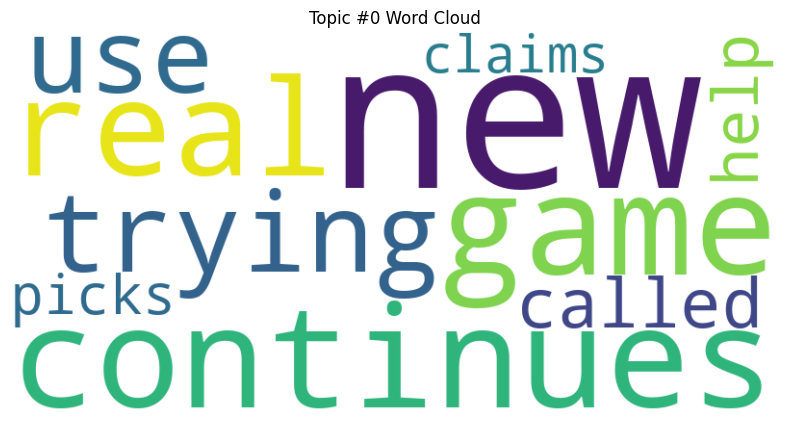

Top 10 words of global topic #1: [('back', 0.12091264873743057), ('take', 0.1093989834189415), ('looks', 0.09788531810045242), ('pulls', 0.08061482757329941), ('need', 0.057587504386901855), ('calls', 0.05183067172765732), ('see', 0.042235955595970154), ('room', 0.03839806467294693), ('come', 0.036479122936725616), ('that.', 0.03072229027748108)]


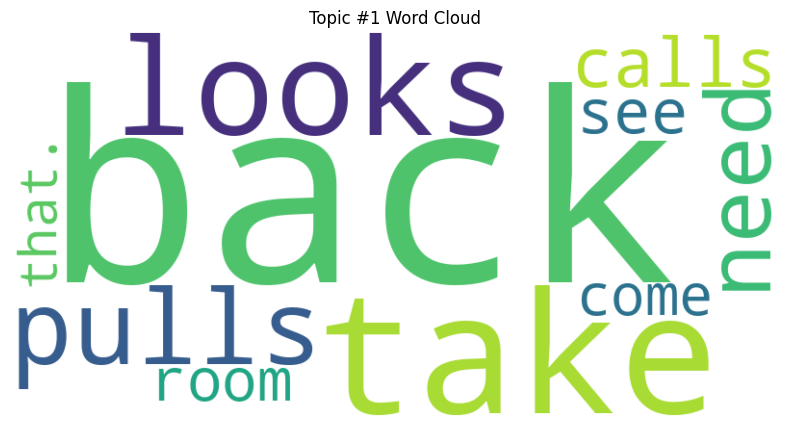

Top 10 words of global topic #2: [('talks', 0.06906550377607346), ('call', 0.055257927626371384), ('behind', 0.05249641090631485), ('woman', 0.05249641090631485), ('camera', 0.049734894186258316), ('made', 0.04421186447143555), ('footage', 0.04145034775137901), ('room.', 0.04145034775137901), ('bed.', 0.04145034775137901), ('plays', 0.04145034775137901)]


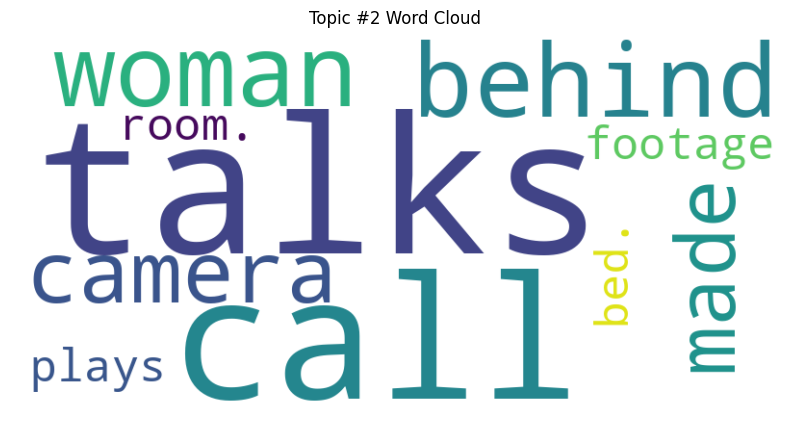

Top 10 words of global topic #3: [('can', 0.11109740287065506), ('used', 0.09053143113851547), ('using', 0.08230503648519516), ('without', 0.078191839158535), ('body', 0.07407864928245544), ('playing', 0.061739061027765274), ('daughter', 0.057625867426395416), ('never', 0.05351267009973526), ('allows', 0.0493994764983654), ('went', 0.0493994764983654)]


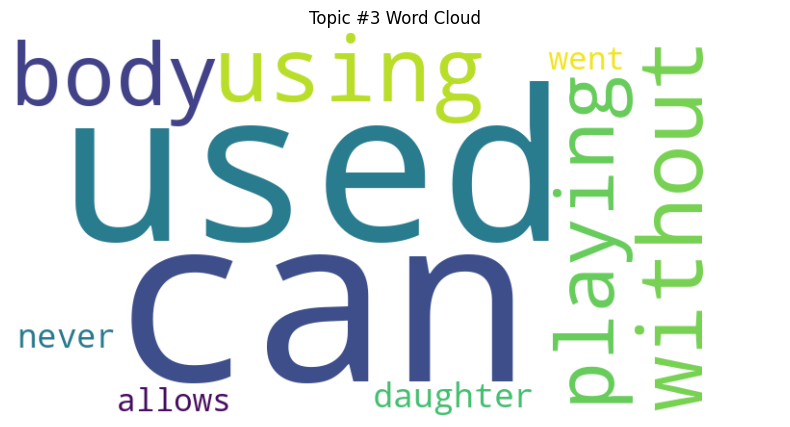

Top 10 words of global topic #4: [('people', 0.11779022216796875), ('find', 0.10208834707736969), ('shows', 0.10208834707736969), ('something', 0.07330158352851868), ('still', 0.07330158352851868), ('tell', 0.06021668761968613), ('picture', 0.05498272925615311), ('got', 0.05498272925615311), ('there.', 0.0523657500743866), ('came', 0.04189783334732056)]


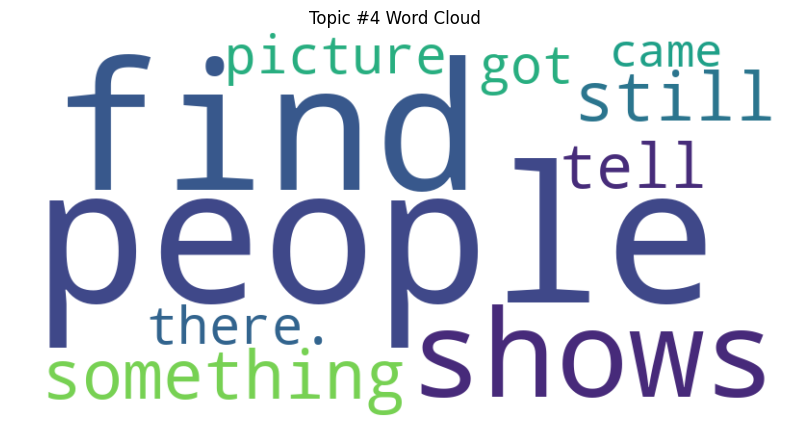

Top 10 words of global topic #5: [('system', 0.24769467115402222), ('Coach', 0.20500341057777405), ('time', 0.1196209043264389), ('together', 0.07692964375019073), ('check', 0.05131489038467407), ('device', 0.05131489038467407), ('use', 0.04277664050459862), ('together.', 0.03423839062452316), ('several', 0.03423839062452316), ('four', 0.02570013515651226)]


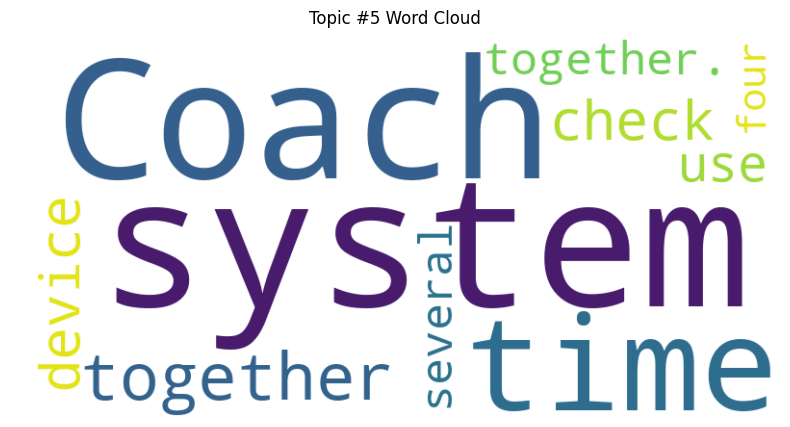

Top 10 words of global topic #6: [('will', 0.18265409767627716), ('show', 0.09935281425714493), ('realizes', 0.08012943714857101), ('look', 0.07692554593086243), ('everyone', 0.06410995870828629), ('try', 0.0609060637652874), ('opens', 0.05770216882228851), ('inside', 0.05129437521100044), ('really', 0.041682686656713486), ('long', 0.0384787917137146)]


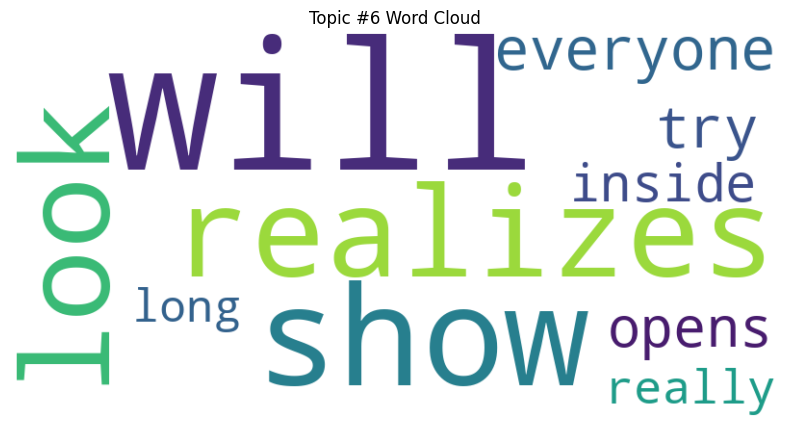

Top 10 words of global topic #7: [('sees', 0.22788938879966736), ('two', 0.10361433774232864), ('car.', 0.10361433774232864), ('hear', 0.0932580828666687), ('car', 0.06736744195222855), ('memory', 0.06736744195222855), ('run', 0.062189314514398575), ('drive', 0.062189314514398575), ('hears', 0.062189314514398575), ('uses', 0.04665493220090866)]


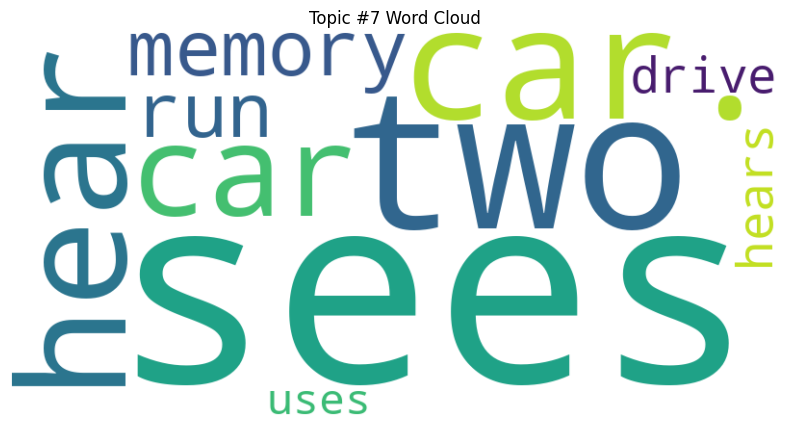

Top 10 words of global topic #8: [('San', 0.11762017011642456), ('monkey', 0.09149686992168427), ('live', 0.07843521982431412), ('first', 0.07843521982431412), ('decides', 0.07843521982431412), ('following', 0.07190439105033875), ('feel', 0.07190439105033875), ('time', 0.06537356972694397), ('him,', 0.06537356972694397), ('able', 0.0588427409529686)]


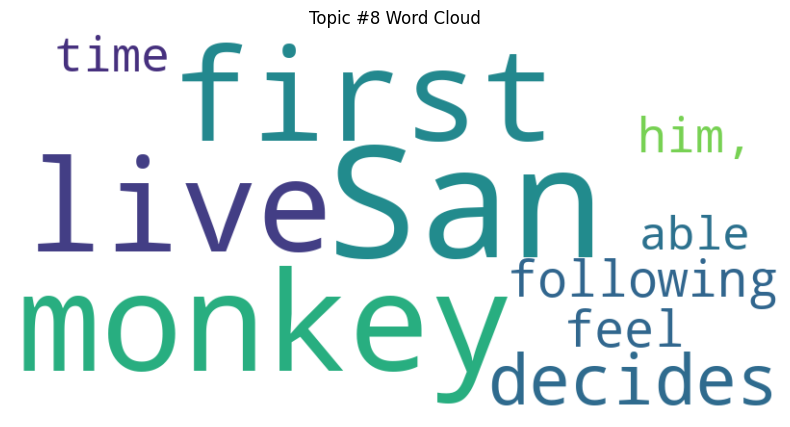

Top 10 words of global topic #9: [('takes', 0.1222909465432167), ('watches', 0.10311181098222733), ('gets', 0.07674050331115723), ('know', 0.0527665913105011), ('like', 0.0527665913105011), ('man', 0.050369199365377426), ('grabs', 0.047971807420253754), ('door', 0.047971807420253754), ('stop', 0.040779631584882736), ('stops', 0.040779631584882736)]


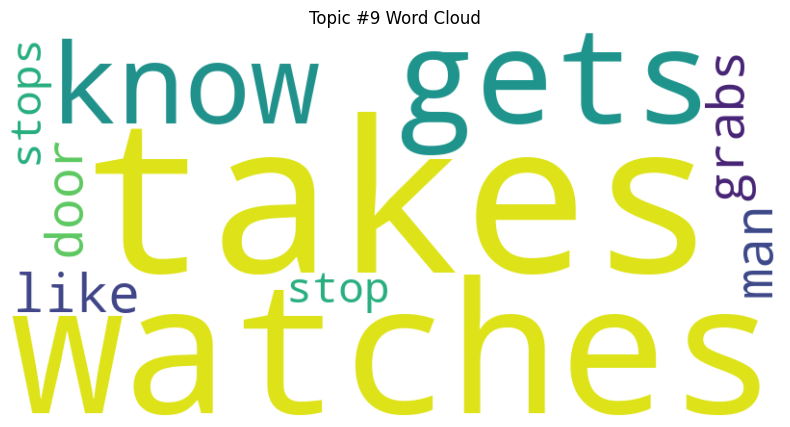

Top 10 words of global topic #10: [('next', 0.12013792246580124), ('kill', 0.09689292311668396), ('explains', 0.07752208411693573), ('back', 0.07364791631698608), ('years', 0.062025416642427444), ('follows', 0.0581512488424778), ('video', 0.0581512488424778), ('(),', 0.0581512488424778), ('up,', 0.04652874916791916), ('family', 0.04265458136796951)]


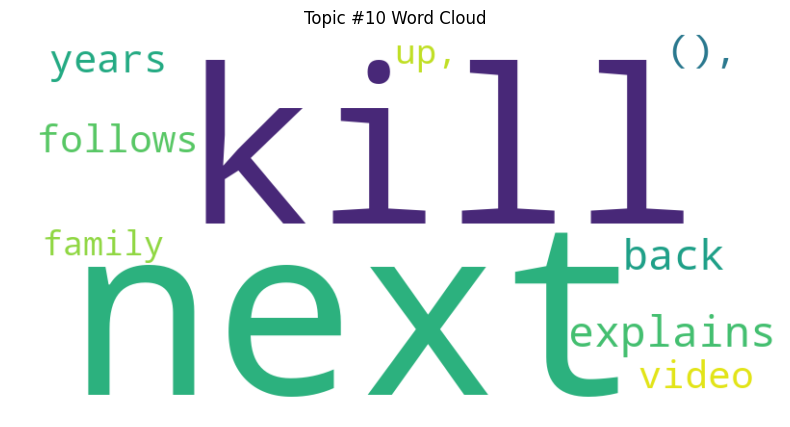

Top 10 words of global topic #11: [('one', 0.22791080176830292), ('saying', 0.08510573953390121), ('found', 0.06079849600791931), ('three', 0.06079849600791931), ('work', 0.054721683263778687), ('killed', 0.051683276891708374), ('every', 0.051683276891708374), ('taking', 0.04864487424492836), ('nearby', 0.04560646787285805), ('day,', 0.03952965512871742)]


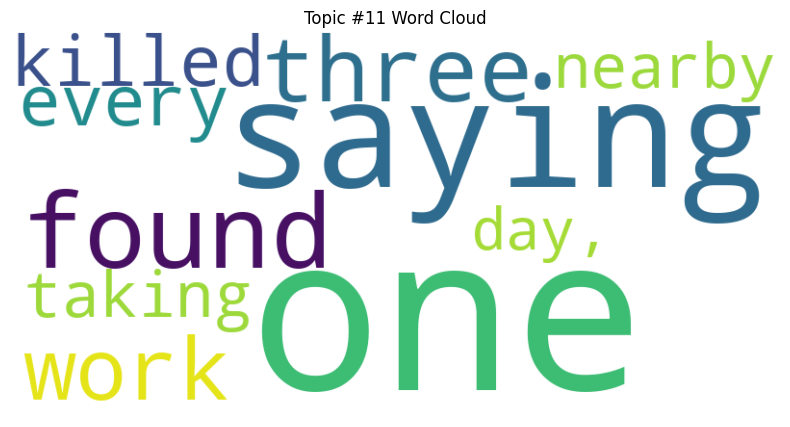

Top 10 words of global topic #12: [('starts', 0.1099601536989212), ('thinks', 0.07903868705034256), ('comes', 0.07388510555028915), ('knows', 0.07216724753379822), ('puts', 0.0618600957095623), ('put', 0.060142237693071365), ('needs', 0.04639936983585358), ('like', 0.04468150809407234), ('think', 0.0378100760281086), ('sits', 0.03609221428632736)]


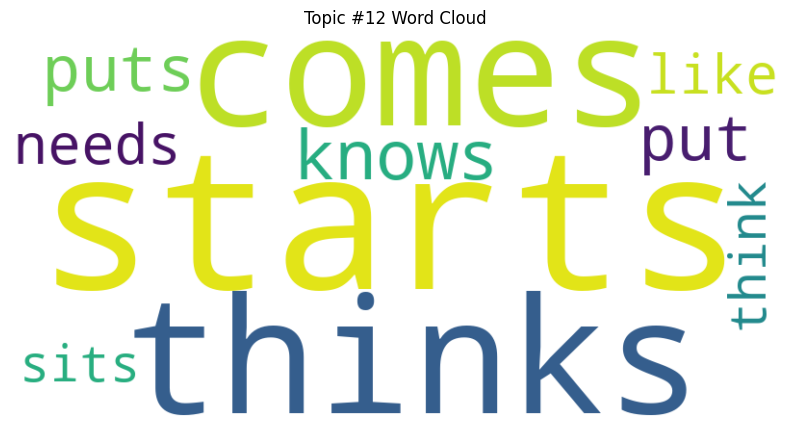

Top 10 words of global topic #13: [('just', 0.13387428224086761), ('wants', 0.09421271830797195), ('make', 0.06777168065309525), ('sees', 0.06446655094623566), ('want', 0.0512460358440876), ('watch', 0.04628834128379822), ('leaves', 0.04298321157693863), ('good', 0.03472038730978966), ('offers', 0.03141525760293007), ('watching', 0.03141525760293007)]


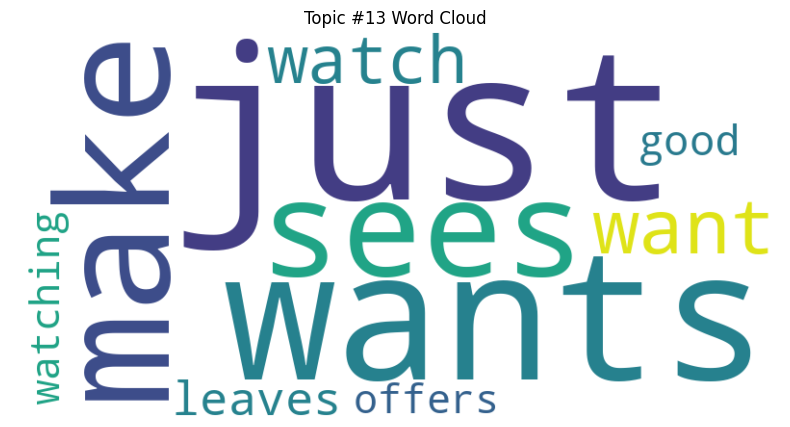

Top 10 words of global topic #14: [('police', 0.3089991807937622), ('dog', 0.15455107390880585), ('eventually', 0.11336490511894226), ('dead', 0.10306836664676666), ('social', 0.10306836664676666), ('car', 0.08247528970241547), ('real', 0.04128912836313248), ('do.', 0.03099258616566658), ('kill', 0.010399505496025085), ('bed', 0.010399505496025085)]


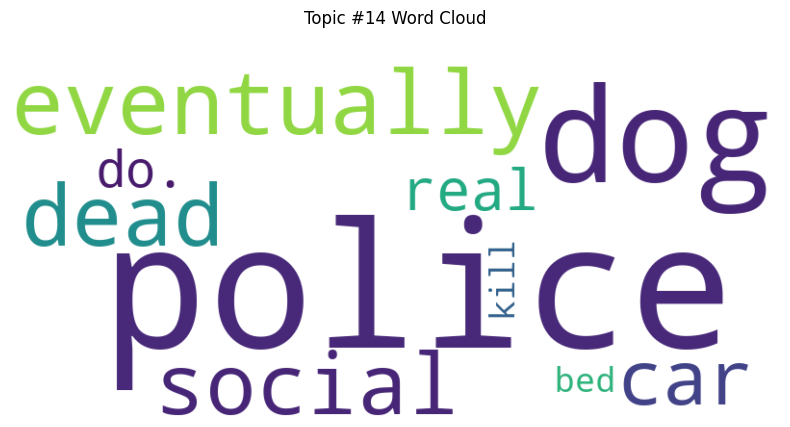

Top 10 words of global topic #15: [('can', 0.18713247776031494), ('finds', 0.09892547875642776), ('away', 0.0668502077460289), ('sex', 0.05883139371871948), ('drives', 0.050812575966119766), ('must', 0.04279375821352005), ('nothing', 0.03744787722826004), ('leaving', 0.034774940460920334), ('life.', 0.03210199996829033), ('see', 0.03210199996829033)]


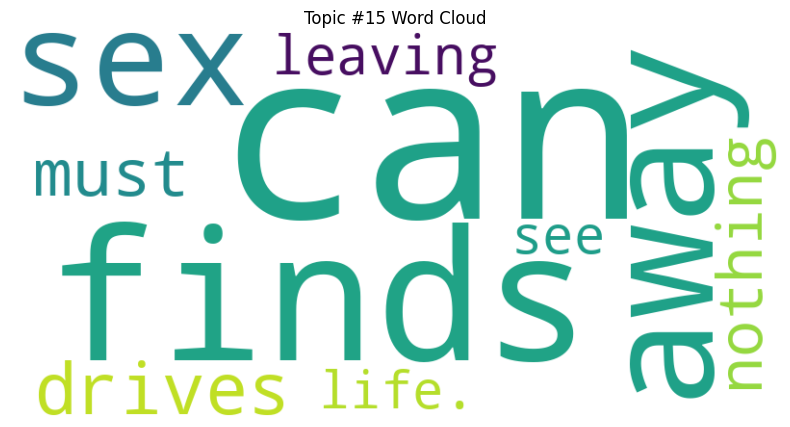

Top 10 words of global topic #16: [('another', 0.10713265836238861), ('day', 0.0714336708188057), ('left', 0.06786377727985382), ('keep', 0.06072397902607918), ('anything', 0.053584180772304535), ('actually', 0.050014279782772064), ('meets', 0.050014279782772064), ('part', 0.04644438251852989), ('start', 0.04644438251852989), ('throws', 0.04287448525428772)]


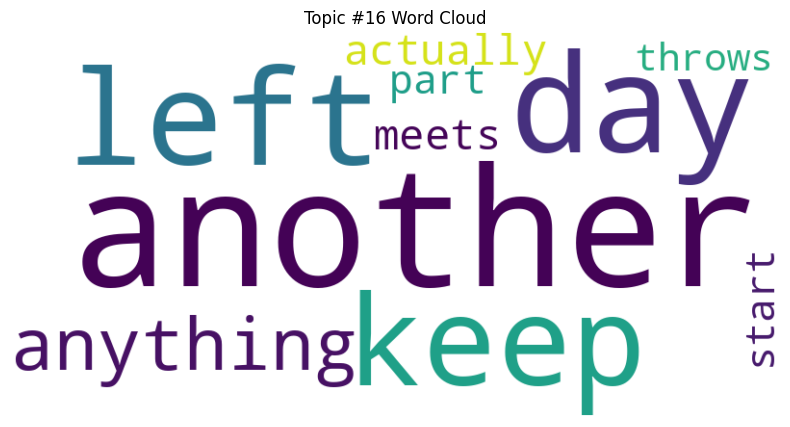

Top 10 words of global topic #17: [('gets', 0.15149863064289093), ('tries', 0.10706495493650436), ('phone', 0.05051300674676895), ('see', 0.05051300674676895), ('her,', 0.04849329590797424), ('now', 0.04243415966629982), ('gives', 0.04041444510221481), ('away.', 0.0363750196993351), ('leaves.', 0.03435530886054039), ('house.', 0.03435530886054039)]


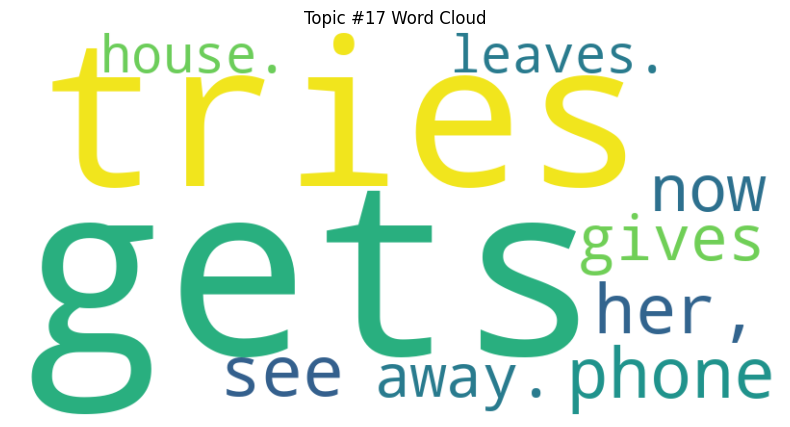

Top 10 words of global topic #18: [('goes', 0.14696158468723297), ('going', 0.08136545121669769), ('even', 0.08136545121669769), ('walks', 0.07087007164955139), ('wakes', 0.07087007164955139), ('like', 0.04987930506467819), ('everything', 0.04725546017289162), ('down.', 0.04725546017289162), ('say', 0.04725546017289162), ('seen', 0.04725546017289162)]


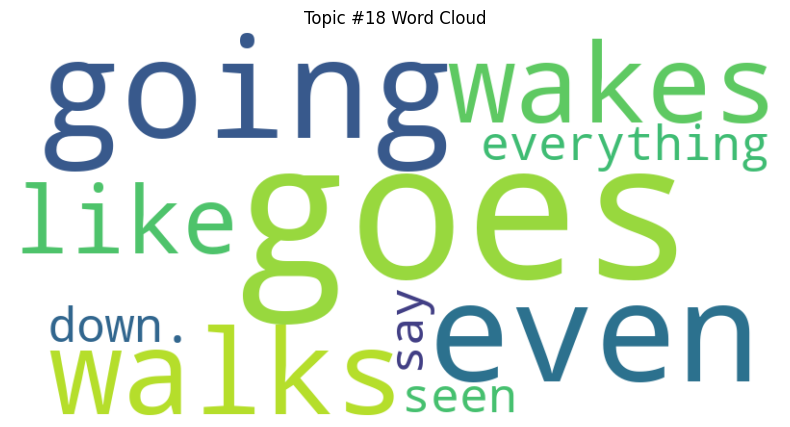

Top 10 words of global topic #19: [('turns', 0.27559685707092285), ('public', 0.19524793326854706), ('knife', 0.13785582780838013), ('room', 0.11489898711442947), ('back', 0.08046372979879379), ('head.', 0.08046372979879379), ('becomes', 0.03455004468560219), ('got', 0.011593203991651535), ('glass', 0.011593203991651535), ('herself.', 0.011593203991651535)]


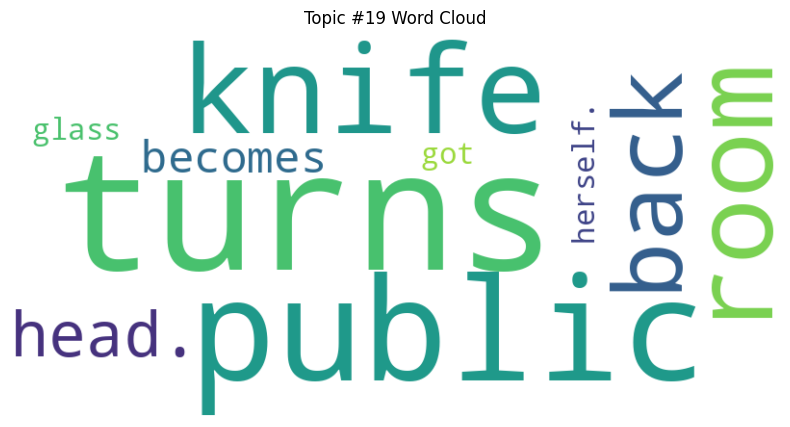

Word clouds created and saved successfully.


In [51]:
import tomotopy as tp
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 自定义停用词
stop_words = set(["around", "Sandy", "Nish", "Stuart", "him.", "Hector", "Shazia", "Cole", "Nicola", "Krish", "Bing", "in.", "them.", "her.", "Parke", "also", "already", "onto", "up.", "is.", "it.", "out.", "Iain", "Dr.", "it,"])

file_name = 'noname.json'

# 读取JSON文件
with open(file_name, 'r') as input_file:
    data = json.load(input_file)

# 确定要创建的主题数量
num_topics = 20

# 创建LDA模型
mdl = tp.LDAModel(k=num_topics, min_cf=10, rm_top=5)

# 添加文档到模型中
for index, row in enumerate(data):
    if index % 1000 == 0 and index > 0:
        print('Adding document #%s' % index)
    content = row['content']
    # 分词并过滤停用词
    clean_document = [token for token in content.strip().split() if len(token) > 2 and token not in stop_words]
    mdl.add_doc(clean_document)

# 训练模型
print('Starting training model')
for i in range(0, 100, 10):
    mdl.train(10)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))

# 打印每个主题的前10个单词并生成词云图
for k in range(mdl.k):
    top_words = mdl.get_topic_words(k, top_n=10)
    print('Top 10 words of global topic #{}: {}'.format(k, top_words))

    # 生成词云数据
    word_freq = {word: freq for word, freq in top_words}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # 显示词云图
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic #{k} Word Cloud')
    plt.show()

    # 保存词云图
    wordcloud.to_file(f'topic_{k}_wordcloud.png')

print('Word clouds created and saved successfully.')


## **Bertopic**

In [52]:
import json
from sklearn.feature_extraction.text import CountVectorizer

# 读取JSON文件
file_name = 'noname.json'

with open(file_name, 'r') as input_file:
    data = json.load(input_file)

# 提取文档和标签
docs = [item['content'] for item in data]
labels = [item['labels'] for item in data]

# 打印文档和标签的数量，以及一个示例文档和它的标签
print(f"Number of documents: {len(docs)}")
print(f"Number of labels: {len(labels)}")
print(f"Sample document: {docs[0]}")
print(f"Sample label: {labels[0]}")

# 使用CountVectorizer将文本转换为向量
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(docs)

print(f"Feature shape: {X.shape}")

Number of documents: 27
Number of labels: 27
Sample document: work small, remote outpost middle snowy wilderness.  wakes Christmas Day find  preparing Christmas dinner, "I Wish Christmas Everyday" playing radio.  tries get  talk accepted job outpost, topic never discussed five years worked together.  reluctant say anything instead asks  took job. Happy conversation,  begins story. story set world people can access Internet augmented reality device implanted eyes called "Z-Eye".  dating coach taught seduction techniques single men struggle attract women. directs one clients, shy socially awkward , gatecrashing office Christmas party, communicates Z-Eye. joined group call single men, voicing opinions suggestions. Using information  gathers social media,  convinces party guests know him, decides try bonding , quiet "attractive outsider" join group conversations. 's help,  manages start conversation , admits used take drugs fit parties, anymore, thinking leaving company Christmas. nervous 

In [5]:
!pip install bertopic --upgrade
import json
from bertopic import BERTopic
from bertopic.backend import BaseEmbedder
from bertopic.cluster import BaseCluster
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.dimensionality import BaseDimensionalityReduction

# Load the JSON file
with open('noname.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Extract documents and labels
docs = [item['content'] for item in data]
y_labels = [item['labels'][0] for item in data]  # Assuming each doc has at least one label and taking the first label

# Create a mapping from labels to integers
label_mapping = {label: i for i, label in enumerate(set(y_labels))}

# Convert labels to integers
y = [label_mapping[label] for label in y_labels]

# Define stopwords
stop_words = set([
    "around", "Sandy", "Nish", "Stuart", "him.", "Hector", "Shazia",
    "Cole", "Nicola", "Krish", "Bing", "in.", "them.", "her.",
    "Parke", "also", "already", "onto", "up.", "is.", "it.", "out.",
    "Iain", "Dr.", "it,", "nish", "hector", "shazia", "nicola", "krish", "bing", "cole", "ransom", "cliff", "stuart", "sandy", "penelope", "parke", "naomi", "ima", "mr", "000"])

# Prepare our empty sub-models and reduce frequent words
empty_embedding_model = BaseEmbedder()
empty_dimensionality_model = BaseDimensionalityReduction()
empty_cluster_model = BaseCluster()
# Remove the stop_words parameter as it is not supported in ClassTfidfTransformer
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

# Fit BERTopic without actually performing any clustering
topic_model = BERTopic(
    embedding_model=empty_embedding_model,
    umap_model=empty_dimensionality_model,
    hdbscan_model=empty_cluster_model,
    ctfidf_model=ctfidf_model
)

# Pass the integer labels to fit_transform, stop words are already handled by ctfidf_model
topics, probs = topic_model.fit_transform(docs, y=y)

# Save and print the topics
print("Generated Topics:", topics)

Generated Topics: [0, 2, 20, 19, 18, 17, 16, 15, 1, 2, 1, 1, 14, 0, 13, 12, 3, 11, 0, 10, 9, 8, 7, 6, 5, 4, 21]


In [6]:
# Map input `y` to topics
mappings = topic_model.topic_mapper_.get_mappings()

# Assuming 'data' should have a dictionary called 'target_names'
# If 'target_names' is actually a list, you'll need to adjust how you map the values
if "target_names" in data and isinstance(data["target_names"], dict):
    mappings = {value: data["target_names"][key] for key, value in mappings.items()}
else:
    print("Warning: 'data' does not contain a 'target_names' dictionary.")
    mappings = {value: key for key, value in mappings.items()}  # Use the original label if no mapping is available

# Assign original classes to our topics
df = topic_model.get_topic_info()
df["Class"] = df.Topic.map(mappings)
df

,Topic,Count,Name,Representation,Representative_Docs,Class
0,0,3,0_nish_monkey_cole_copy,"[nish, monkey, cole, copy, christmas, museum, ...","[Captain () crew aboard spaceship, , trying d...",7
1,1,3,1_junipero_san_roaches_technology,"[junipero, san, roaches, technology, glitches,...","[), man living mother, leaves home travel worl...",3
2,2,2,2_demand_public_ransom_broadcast,"[demand, public, ransom, broadcast, susannah, ...",[Kenny gets call mother. face bruised bloodied...,16
3,3,1,3_coach_match_nicola_system,"[coach, match, nicola, system, date, expiratio...",[coach directs hub. walks several crowded are...,2
4,4,1,4_bo_hector_pictures_clay,"[bo, hector, pictures, clay, diner, suv, drive...",[Bo sits motel parking lot listening radio rep...,0
5,5,1,5_cliff_station_earth_painting,"[cliff, station, earth, painting, family, repl...","[drawing portrait two children, daughter reac...",19
6,6,1,6_stuart_tape_tapes_film,"[stuart, tape, tapes, film, iain, actress, doc...","[Koresh sleeps shoulder drives. arrive home ,...",18
7,7,1,7_krish_sandy_tv_awful,"[krish, sandy, tv, awful, show, source, julian...","[wakes phone alarm. turns sits bed. Krish, , r...",12
8,8,1,8_bear_dr_fans_music,"[bear, dr, fans, music, too, coma, songs, aunt...","[busy school cafeteria, sits alone, watching ...",14
9,9,1,9_penelope_media_social_police,"[penelope, media, social, police, driver, retr...","[2018, () rideshare driver London app Hitcher...",8


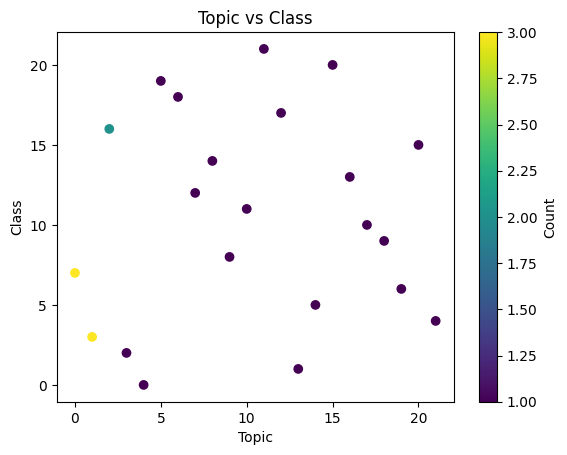

In [9]:
# @title Topic vs Class

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['Topic'], df['Class'], c=df['Count'])
plt.xlabel('Topic')
plt.ylabel('Class')
plt.title('Topic vs Class')
_ = plt.colorbar(label='Count')

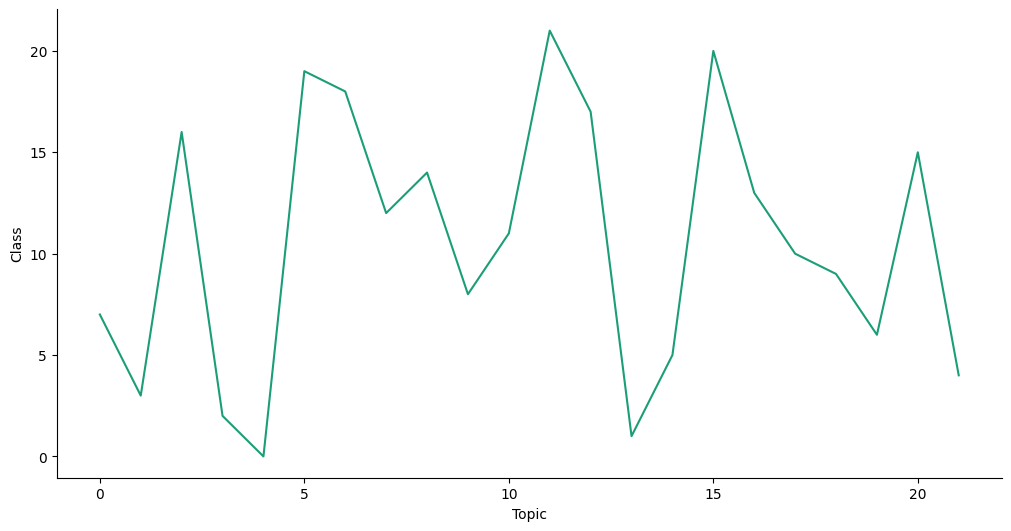

In [8]:
# @title Topic vs Class

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Topic']
  ys = series['Class']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Topic', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Topic')
_ = plt.ylabel('Class')

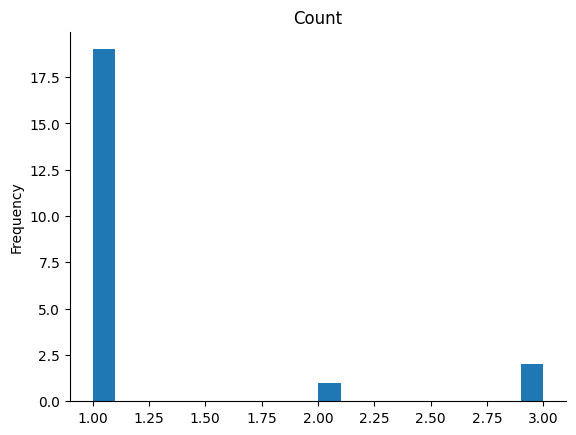

In [7]:
# @title Count

from matplotlib import pyplot as plt
df['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)